In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

# Data Preprocessing

In [2]:
train_df = pd.read_csv('adult_trdata.csv',skipinitialspace=True)
train_df


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
train_df.rename(columns = {"39":"age", "State-gov":"workclass", "77516":"fnlwgt", "Bachelors":"education", "13":"education-num", 
                    "Never-married":"marital-status", "Adm-clerical":"occupation", "Not-in-family":"relationship", "White":"race", 
                    "Male":"sex", "2174":"capital-gain", "0":"capital-loss", "40":"hours-per-week", "United-States":"native-country",
                    "<=50K":"income"},inplace = True)

In [4]:
train_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test_df = pd.read_csv('adult_test.csv',skipinitialspace=True)
test_df

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
test_df.reset_index(inplace=True)
test_df.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,level_13,|1x3 Cross validator
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
test_df.rename(columns = {"level_0":"age", "level_1":"workclass", "level_2":"fnlwgt", "level_3":"education", "level_4":"education-num", 
                    "level_5":"marital-status","level_6":"occupation", "level_7":"relationship", "level_8":"race", 
                    "level_9":"sex", "level_10":"capital-gain", "level_11":"capital-loss", "level_12":"hours-per-week", "level_13":"native-country",
                    "|1x3 Cross validator":"income"},inplace = True)
test_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [8]:
#check nan in train_df
train_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
#convert "?" into NaN and count the number of rows that contain NaN in any column
train_df.replace({"?":np.nan},inplace=True)
train_df1 = train_df.apply(lambda x: x.isnull().any(), axis=1)
numofrows = len(train_df1[train_df1 == True].index)
print(numofrows)

2399


<AxesSubplot:>

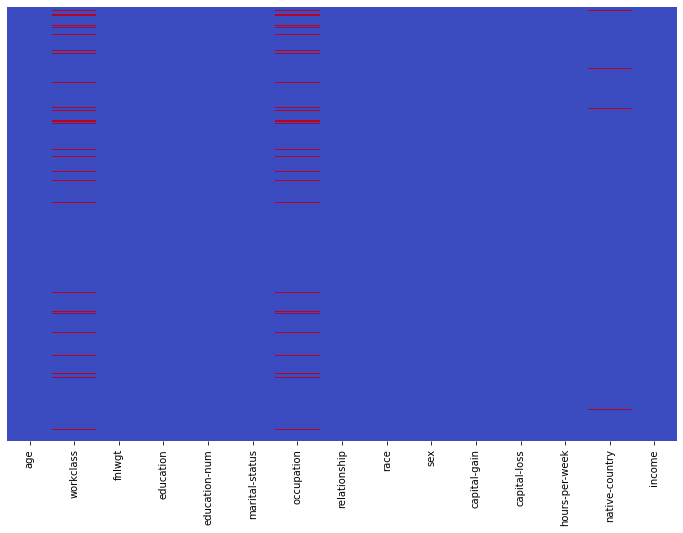

In [10]:
#visualize missing values across feature space
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(train_df.isna(),cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [11]:
#check nan in test_df
test_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
#convert "?" into NaN and count the number of rows that contain NaN in any column
test_df.replace({"?":np.nan},inplace=True)
test_df1 = test_df.apply(lambda x: x.isnull().any(), axis=1)
numofrows = len(test_df1[test_df1 == True].index)
print(numofrows)

1221


<AxesSubplot:>

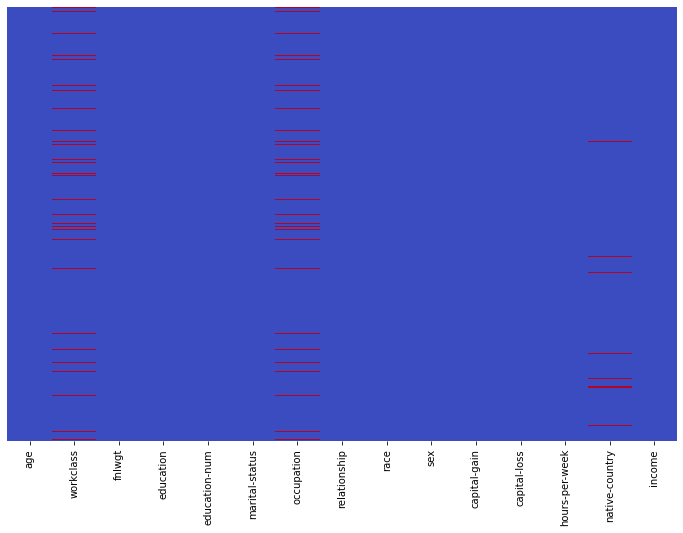

In [13]:
#visualize missing data in test_df across feature space
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(test_df.isna(),cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [14]:
train_df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [15]:
#fill the missing values from workclass column with "Private"
train_df['workclass'].fillna("Private",inplace=True)
train_df['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [16]:
test_df['workclass'].value_counts()

Private             11210
Self-emp-not-inc     1321
Local-gov            1043
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: workclass, dtype: int64

In [17]:
#fill the missing values from workclass column with "Private"
test_df['workclass'].fillna("Private",inplace=True)
test_df['workclass'].value_counts()

Private             12173
Self-emp-not-inc     1321
Local-gov            1043
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: workclass, dtype: int64

In [18]:
train_df['occupation'].isna().sum()

1843

In [19]:
train_df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [20]:
#drop rows that contain NaN under occupation since occupation is an important factor to predict income and there is 
#no other way to guess the missing values
train_df.dropna(subset=['occupation'],inplace=True)
train_df.shape[0]

30717

In [21]:
test_df['occupation'].isna().sum()

966

In [22]:
test_df['occupation'].value_counts()

Prof-specialty       2032
Exec-managerial      2020
Craft-repair         2013
Sales                1854
Adm-clerical         1841
Other-service        1628
Machine-op-inspct    1020
Transport-moving      758
Handlers-cleaners     702
Tech-support          518
Farming-fishing       496
Protective-serv       334
Priv-house-serv        93
Armed-Forces            6
Name: occupation, dtype: int64

In [23]:
#drop rows that contain NaN under occupation since occupation is an important factor to predict income and there is 
#no other way to guess the missing values
test_df.dropna(subset=['occupation'],inplace=True)
test_df.shape[0]

15315

In [24]:
train_df['native-country'].isna().sum()

556

In [25]:
train_df['native-country'].value_counts()

United-States                 27503
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [26]:
#replace missing values from 'native-country' column with 'United States'
train_df['native-country'].fillna("United-States",inplace=True)

In [27]:
#reduce the number of categories of 'native-country' column and reclassify based on continent
train_df['native-country'].replace(to_replace=["Philippines","India","China","South","Vietnam","Japan","Iran","Taiwan","Hong","Cambodia",
                                        "Thailand","Laos","Outlying-US(Guam-USVI-etc)"], value="Asia",inplace=True)
train_df['native-country'].replace(to_replace=["Germany","England","Italy","Poland","Portugal","Greece","France","Ireland","Yugoslavia",
                                        "Hungary","Scotland","Holand-Netherlands"],value="Europe",inplace=True)
train_df['native-country'].replace(to_replace=["Mexico","Puerto-Rico","El-Salvador","Cuba","Jamaica","Dominican-Republic","Guatemala",
                                        "Columbia","Haiti","Nicaragua","Peru","Ecuador","Trinadad&Tobago","Honduras"],value="Latin America",inplace=True)

In [28]:
train_df['native-country'].value_counts()

United-States    28059
Latin America     1339
Asia               719
Europe             493
Canada             107
Name: native-country, dtype: int64

In [29]:
test_df['native-country'].isna().sum()

255

In [30]:
test_df['native-country'].value_counts()

United-States                 13788
Mexico                          293
Philippines                      95
Puerto-Rico                      66
Germany                          65
Canada                           56
El-Salvador                      47
India                            47
China                            45
Cuba                             41
England                          33
Italy                            32
South                            30
Dominican-Republic               30
Japan                            30
Portugal                         28
Haiti                            27
Columbia                         26
Poland                           25
Guatemala                        23
Jamaica                          23
Greece                           20
Vietnam                          19
Ecuador                          16
Nicaragua                        15
Peru                             15
Iran                             14
Taiwan                      

In [31]:
#reduce the number of categories of 'native-country' column and reclassify based on continent
test_df['native-country'].fillna("United-States",inplace=True)
test_df['native-country'].replace(to_replace=["Philippines","India","China","South","Vietnam","Japan","Iran","Taiwan","Hong","Cambodia",
                                        "Thailand","Laos","Outlying-US(Guam-USVI-etc)"], value="Asia",inplace=True)
test_df['native-country'].replace(to_replace=["Germany","England","Italy","Poland","Portugal","Greece","France","Ireland","Yugoslavia",
                                        "Hungary","Scotland","Holand-Netherlands"],value="Europe",inplace=True)
test_df['native-country'].replace(to_replace=["Mexico","Puerto-Rico","El-Salvador","Cuba","Jamaica","Dominican-Republic","Guatemala",
                                        "Columbia","Haiti","Nicaragua","Peru","Ecuador","Trinadad&Tobago","Honduras"],value="Latin America",inplace=True)

In [32]:
test_df['native-country'].value_counts()

United-States    14043
Latin America      637
Asia               334
Europe             245
Canada              56
Name: native-country, dtype: int64

In [33]:
train_df['education'].value_counts()

HS-grad         9968
Some-college    6775
Bachelors       5181
Masters         1675
Assoc-voc       1321
11th            1056
Assoc-acdm      1020
10th             831
7th-8th          573
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64

In [34]:
#reduce the number of categories of education column
train_df['education'].replace(to_replace=["1st-4th","5th-6th"],value="Elementary",inplace=True)
train_df['education'].replace(to_replace=["7th-8th","9th","10th","11th","12th"],value="Some-HS",inplace=True)
train_df['education'].value_counts()

HS-grad         9968
Some-college    6775
Bachelors       5181
Some-HS         3316
Masters         1675
Assoc-voc       1321
Assoc-acdm      1020
Prof-school      558
Elementary       459
Doctorate        398
Preschool         46
Name: education, dtype: int64

In [35]:
#reduce the number of categories of education column
test_df['education'].replace(to_replace=["1st-4th","5th-6th"],value="Elementary",inplace=True)
test_df['education'].replace(to_replace=["7th-8th","9th","10th","11th","12th"],value="Some-HS",inplace=True)
test_df['education'].value_counts()

HS-grad         5004
Some-college    3261
Bachelors       2590
Some-HS         1684
Masters          915
Assoc-voc        657
Assoc-acdm       509
Prof-school      252
Elementary       238
Doctorate        178
Preschool         27
Name: education, dtype: int64

In [36]:
train_df['capital-gain'].value_counts()

0        28129
15024      343
7688       278
7298       244
99999      155
         ...  
6097         1
2538         1
401          1
1455         1
1086         1
Name: capital-gain, Length: 118, dtype: int64

<AxesSubplot:ylabel='Frequency'>

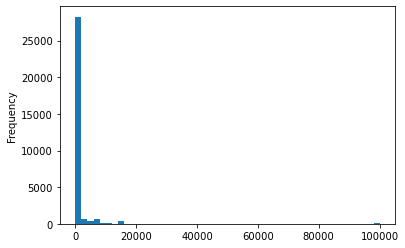

In [37]:
train_df['capital-gain'].plot.hist(bins=50)

In [38]:
import sklearn 
from sklearn import preprocessing
#Discretize capital gain feature into 5 bins in train_df
A = train_df[['capital-gain']]
est1 = preprocessing.KBinsDiscretizer(n_bins = 5, encode='ordinal',strategy='kmeans').fit(A)
At = est1.transform(A)                                                                                        
train_df['capital-gain-discretized'] = At
train_df['capital-gain-discretized'].value_counts()

0.0    28501
1.0     1467
2.0      542
4.0      155
3.0       52
Name: capital-gain-discretized, dtype: int64

In [39]:
#Discretizing capital gain feature into 5 bins in test_df
D = test_df[['capital-gain']]
est3 = preprocessing.KBinsDiscretizer(n_bins = 5, encode='ordinal',strategy='kmeans').fit(D)
Dt = est3.transform(D)                                                                                        
test_df['capital-gain-discretized'] = Dt
test_df['capital-gain-discretized'].value_counts()

0.0    14226
1.0      727
2.0      247
4.0       84
3.0       31
Name: capital-gain-discretized, dtype: int64

In [40]:
train_df['capital-loss'].value_counts()

0       29256
1902      199
1977      167
1887      157
1848       50
        ...  
2457        1
4356        1
1539        1
1844        1
1411        1
Name: capital-loss, Length: 90, dtype: int64

<AxesSubplot:ylabel='Frequency'>

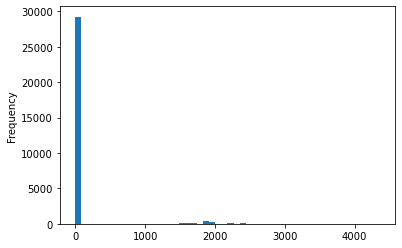

In [41]:
train_df['capital-loss'].plot.hist(bins=50)

In [42]:
#Discretizing capital loss feature into 5 bins in train_df
B = train_df[['capital-loss']]
est2 = preprocessing.KBinsDiscretizer(n_bins = 5, encode='ordinal',strategy='kmeans').fit(B)
Bt = est2.transform(B)                                                                                        
train_df['capital-loss-discretized'] = Bt
train_df['capital-loss-discretized'].value_counts()

0.0    29280
2.0      758
1.0      458
3.0      214
4.0        7
Name: capital-loss-discretized, dtype: int64

In [43]:
#Discretizing capital loss feature into 5 bins in test_df
E = test_df[['capital-loss']]
est4 = preprocessing.KBinsDiscretizer(n_bins = 5, encode='ordinal',strategy='kmeans').fit(E)
Et = est4.transform(E)                                                                                        
test_df['capital-loss-discretized'] = Et
test_df['capital-loss-discretized'].value_counts()

0.0    14604
2.0      432
1.0      166
3.0      102
4.0       11
Name: capital-loss-discretized, dtype: int64

In [44]:
#Encode target labels with values 0 and 1 in train_df
C = train_df[['income']]
le = preprocessing.LabelEncoder().fit(C)
Ct = le.transform(C)
train_df['income_encoded'] = Ct
train_df.drop('income',axis=1)
train_df.head()

/Users/jasonwang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-gain-discretized,capital-loss-discretized,income_encoded
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.0,0.0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.0,0.0,0
2,53,Private,234721,Some-HS,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.0,0.0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Latin America,<=50K,0.0,0.0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0.0,0.0,0


In [45]:
#Encode target labels with values 0 and 1 in test_df
F = test_df[['income']]
le = preprocessing.LabelEncoder().fit(F)
Ft = le.transform(F)
test_df['income_encoded'] = Ft
test_df.head()

/Users/jasonwang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-gain-discretized,capital-loss-discretized,income_encoded
0,25,Private,226802,Some-HS,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0.0,0.0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0.0,0.0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0.0,0.0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,1.0,0.0,1
5,34,Private,198693,Some-HS,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,0.0,0.0,0


In [46]:
#Replace categorical features with one-hot-encoded columns in train_df
categorical_features = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
for col in categorical_features:
    col_ohe = pd.get_dummies(train_df[col],prefix=col)
    train_df = pd.concat((train_df, col_ohe), axis=1).drop(col, axis=1).drop(columns=col_ohe.columns[0],axis=1)
train_df.columns
                        

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'capital-gain-discretized',
       'capital-loss-discretized', 'income_encoded', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_Elementary', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-HS', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occ

In [47]:
#Replace categorical features with one-hot-encoded columns in test_df
for col in categorical_features:
    col_ohe = pd.get_dummies(test_df[col],prefix=col)
    test_df = pd.concat((test_df, col_ohe), axis=1).drop(col, axis=1).drop(columns=col_ohe.columns[0],axis=1)
test_df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'capital-gain-discretized',
       'capital-loss-discretized', 'income_encoded', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_Elementary', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-HS', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occ

In [48]:
#drop useless features in train_df
train_df.drop(['capital-gain','capital-loss','income','fnlwgt'],axis=1,inplace=True)
train_df

,age,education-num,hours-per-week,capital-gain-discretized,capital-loss-discretized,income_encoded,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_Europe,native-country_Latin America,native-country_United-States
0,50,13,13,0.0,0.0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
1,38,9,40,0.0,0.0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
2,53,7,40,0.0,0.0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,28,13,40,0.0,0.0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
4,37,14,40,0.0,0.0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,38,0.0,0.0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
32556,40,9,40,0.0,0.0,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
32557,58,9,40,0.0,0.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
32558,22,9,20,0.0,0.0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1


In [49]:
#drop useless features in test_df
test_df.drop(['capital-gain','capital-loss','income','fnlwgt'],axis=1,inplace=True)
test_df

,age,education-num,hours-per-week,capital-gain-discretized,capital-loss-discretized,income_encoded,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_Europe,native-country_Latin America,native-country_United-States
0,25,7,40,0.0,0.0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,38,9,50,0.0,0.0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
2,28,12,40,0.0,0.0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
3,44,10,40,1.0,0.0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
5,34,6,30,0.0,0.0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,13,40,0.0,0.0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
16276,39,13,36,0.0,0.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
16278,38,13,50,0.0,0.0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
16279,44,13,40,1.0,0.0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


# Model Building (Logistic Regression)

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

X_train = train_df.drop(['income_encoded'],axis=1)
y_train = train_df['income_encoded']
X_test = test_df.drop(['income_encoded'],axis=1)
y_test = test_df['income_encoded']

#fit logistic regression model to training data and evaluate model performance on training and testing sets 

logr = LogisticRegression(max_iter=5000)
logr = logr.fit(X_train, y_train)
#predictions_train = logr.predict(X_train)
#predictions_test = logr.predict(X_test)
print("Training set score: {:.4f}".format(logr.score(X_train, y_train)))
print("Test set score: {:.4f}".format(logr.score(X_test, y_test)))

    

Training set score: 0.8466
Test set score: 0.8467


In [52]:
#save the model which will be used to transform test data in app.py
import pickle
pickle.dump(logr, open("logr.pkl", "wb"))

In [53]:
#use cross validation to evaluate model performance on validation set 
logr = LogisticRegression(max_iter=5000)

#obtain validation scores from 5 cross validation sets 
scores = cross_val_score(logr, X_train, y_train, cv=5, n_jobs=1, scoring=None)#20% of the X_train data is validation data

#obtain mean score 
mean_scores = scores.mean()
print("Validation set score: {:.4f}".format(mean_scores))

Validation set score: 0.8457


Plot learning curve helps visualize the accuracy of the models we are building. It plots as a continuous line the mean values of the scores of the chosen estimator for two data sets, and a coloured band around the mean line, i.e., the interval (mean - standard deviation, mean + standard deviation).

In [54]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/Users/jasonwang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

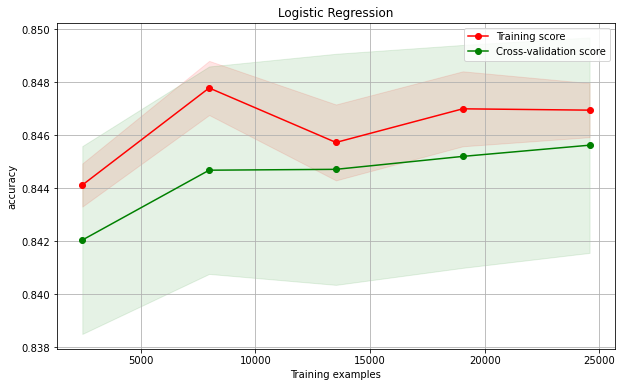

In [55]:
plot_learning_curve(logr,'Logistic Regression', X_train, y_train, cv=5)

Both training and cross-validation score stay around 85% accuracy as training examples grow. Cross validation score is slightly lower than training score, which indicates a good model fit. 

# Hyperparameter Tunning using Grid Search with Cross Validation

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#use grid search to select hyperparameters that optimize the model
logr = LogisticRegression(max_iter=50000)
#use scaler to reduce impact of features with greater scales
scaler = StandardScaler()

#setting up the pipeline
pipe = Pipeline([("scaler", scaler),("logr", logr)])

#This is the parameter grid for grid search
param_grid = [{'logr__C':[0.01,0.05,0.1,0.5,1,5,10]}]

#run grid search to find the best parameters
grid_search_object = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")

grid_search_object.fit(X_train,y_train)
best_parameters=grid_search_object.best_params_
print("best C: ", best_parameters['logr__C'])

#instantiate and fit the best model (using the best parameters)
best_logr = LogisticRegression(C=best_parameters['logr__C'])

#scale the original data 
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
best_logr.fit(X_train_s, y_train)
predictions_test = best_logr.predict(X_test_s)

print("Training set score: {:.4f}".format(best_logr.score(X_train_s, y_train)))
print("Test set score: {:.4f}".format(best_logr.score(X_test_s, y_test)))








best C:  0.1
Training set score: 0.8466
Test set score: 0.8466


Hyperparameter tunning uses C value as param_grid and finds out the best C value is 0.1. 
The model performance is similar compared to the previous results, which is about 85% accuracy. 

In [57]:
#append test predictions into test dataset
test_df['predictions'] = predictions_test
test_df[['income_encoded','predictions']]

,income_encoded,predictions
0,0,0
1,0,0
2,1,0
3,1,1
5,0,0
...,...,...
16275,0,0
16276,0,0
16278,0,1
16279,0,0


In [58]:
#filter test data that contains predictions == 1
test_df[test_df['predictions']==1]

,age,education-num,hours-per-week,capital-gain-discretized,capital-loss-discretized,income_encoded,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_Europe,native-country_Latin America,native-country_United-States,predictions
3,44,10,40,1.0,0.0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,1
7,63,15,32,1.0,0.0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,1
10,65,9,40,1.0,0.0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
11,36,13,40,0.0,0.0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
14,48,9,48,1.0,0.0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16255,43,14,50,0.0,2.0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,1
16261,40,15,55,2.0,0.0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
16265,50,14,40,0.0,0.0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
16278,38,13,50,0.0,0.0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1


In [59]:
#visualize scaled test data in dataframe 
test_df_s = pd.DataFrame(X_test_s,columns = X_test.columns)
test_df_s

,age,education-num,hours-per-week,capital-gain-discretized,capital-loss-discretized,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_Europe,native-country_Latin America,native-country_United-States
0,-1.024800,-1.221590,-0.079208,-0.240644,-0.207213,-0.270408,0.594483,-0.194169,-0.300305,-0.209966,...,-0.221373,-0.180962,3.091812,-0.090219,-2.440137,0.691160,-0.059124,-0.127717,-0.213491,0.307781
1,-0.033813,-0.441076,0.755141,-0.240644,-0.207213,-0.270408,0.594483,-0.194169,-0.300305,-0.209966,...,-0.221373,-0.180962,-0.323435,-0.090219,0.409813,0.691160,-0.059124,-0.127717,-0.213491,0.307781
2,-0.796111,0.729694,-0.079208,-0.240644,-0.207213,3.698116,-1.682133,-0.194169,-0.300305,-0.209966,...,-0.221373,-0.180962,-0.323435,-0.090219,0.409813,0.691160,-0.059124,-0.127717,-0.213491,0.307781
3,0.423566,-0.050820,-0.079208,1.981139,-0.207213,-0.270408,0.594483,-0.194169,-0.300305,-0.209966,...,-0.221373,-0.180962,3.091812,-0.090219,-2.440137,0.691160,-0.059124,-0.127717,-0.213491,0.307781
4,-0.338732,-1.611846,-0.913558,-0.240644,-0.207213,-0.270408,0.594483,-0.194169,-0.300305,-0.209966,...,-0.221373,-0.180962,-0.323435,-0.090219,0.409813,0.691160,-0.059124,-0.127717,-0.213491,0.307781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15310,-0.414962,1.119950,-0.079208,-0.240644,-0.207213,-0.270408,0.594483,-0.194169,-0.300305,-0.209966,...,-0.221373,-0.180962,-0.323435,-0.090219,0.409813,0.691160,-0.059124,-0.127717,-0.213491,0.307781
15311,0.042417,1.119950,-0.412948,-0.240644,-0.207213,-0.270408,0.594483,-0.194169,-0.300305,-0.209966,...,-0.221373,-0.180962,-0.323435,-0.090219,0.409813,-1.446843,-0.059124,-0.127717,-0.213491,0.307781
15312,-0.033813,1.119950,0.755141,-0.240644,-0.207213,-0.270408,0.594483,-0.194169,-0.300305,-0.209966,...,-0.221373,-0.180962,-0.323435,-0.090219,0.409813,0.691160,-0.059124,-0.127717,-0.213491,0.307781
15313,0.423566,1.119950,-0.079208,1.981139,-0.207213,-0.270408,0.594483,-0.194169,-0.300305,-0.209966,...,-0.221373,5.526026,-0.323435,-0.090219,-2.440137,0.691160,-0.059124,-0.127717,-0.213491,0.307781
